In [66]:
#!python3 -m spacy download en
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
import spacy

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [67]:
#df = pd.read_csv('dataset/ShireenMazari1.csv')
name ='ShireenMazari1_clean'
df = pd.read_csv('dataset/'+name+'.csv',usecols=['text'],na_values='[]')
df.head(5)



,text
0,Law Minister chairs CCLC - cabinet committee on legislation includes cabinet mbrs. Now CCLC summary of approved bills will go to cabinet for approval. https://t.co/2cQf2kBdGa
1,"Today CCLC approved 2 very critical bills: Journalist Protection Bill and the Enforced Disappearances bill which criminalizes enforced disappearances. This is major step forward in strengthening human rights by PTI govt. Will be tabled in next NA session, after cabinet approval"
2,HR orgs incl HRW ask EU to call out India on its massive human rights violations at the 8 May Summit of EU ldrs with India. EU is asked to break it's silence on India's human rights violations incl in IIOJK. https://t.co/yuumeft7s9
3,This is now becoming ridiculous and some rationality has to prevail to stop media from becoming a free for all for slander and fake news by all and sundry. https://t.co/fIPPKrUrLa
4,On Labour Day we salute our workers who are the backbone of any country. Our govt has been sensitive to &amp; provided support esp 4 our daily wage earners during Covid pandemic. We have a long road to traverse in ensuring labour rights across the board but r moving in that direction


In [70]:
pd.Series(' '.join(df['text']).lower().split()).value_counts()[:30]

to       10212
of        9252
the       8976
in        7946
a         5247
&amp;     4989
is        4909
on        4509
and       4238
for       3426
not       2984
but       2947
with      2738
us        2567
as        2463
so        2389
it        2382
we        2372
have      2343
-         2326
by        2286
r         2271
i         2260
has       2089
be        2080
this      1990
2         1949
all       1844
pak       1826
no        1816
dtype: int64

##### Find Mentioned

In [71]:
def find_mentioned(df):
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', df)


###### Find Hashtags

In [72]:
def find_hashtags(df):
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', df)

In [73]:
def deEmojify(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

######  Clean text for pre-processing. 

In [74]:
def clean_text(text):
    text = re.sub("@[A-Za-z0-9]+","",text) #Remove @ sign like mentioned
    text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text) #Remove http links
    text = re.sub(r"(#[A-Za-z]+[A-Za-z0-9-_]+)\S+", "", text) #Remove http links
    text = text.replace('\n','')
    text  = "".join([char for char in text if char not in string.punctuation]) # remove punctuation
    text = re.sub('[0-9]+', '', text) # remove all numbers
    text = deEmojify(text)
    text = text.strip()
    return text

In [75]:
#df['mentioned'] = df.text.apply(find_mentioned)
#df['hashtags'] = df.text.apply(find_hashtags)

df['text'] = df['text'].apply(lambda x: clean_text(x))

In [76]:
df.head(10)


,text
0,Law Minister chairs CCLC cabinet committee on legislation includes cabinet mbrs Now CCLC summary of approved bills will go to cabinet for approval
1,Today CCLC approved very critical bills Journalist Protection Bill and the Enforced Disappearances bill which criminalizes enforced disappearances This is major step forward in strengthening human rights by PTI govt Will be tabled in next NA session after cabinet approval
2,HR orgs incl HRW ask EU to call out India on its massive human rights violations at the May Summit of EU ldrs with India EU is asked to break its silence on Indias human rights violations incl in IIOJK
3,This is now becoming ridiculous and some rationality has to prevail to stop media from becoming a free for all for slander and fake news by all and sundry
4,On Labour Day we salute our workers who are the backbone of any country Our govt has been sensitive to amp provided support esp our daily wage earners during Covid pandemic We have a long road to traverse in ensuring labour rights across the board but r moving in that direction
5,Shameful how a channel delib chose to put out fake news and not for the first time either Perhaps the channel would have the decency to issue an apology
6,So now PPP amp PMLN accuse each other of fraud in Khi bye election The prevailing system will continue to produce such accusations PTI has been proposing major electoral reforms but Opposition refuses to even discuss Instead they prefer trading barbs within a faulty system Why
7,We have issues to resolve but there has been more movement now on our HR Int Convention commitments than in previous govts The way forward is dialogue amp negotiations which we have been doing not extreme public positionings Unfortunate
8,It is unfortunate that the co sponsor of the EUs anti Pakistan resolution was a member of a party that the Swedish PM Stefan Lofven referred to as a neofascist single issue party with Nazi and racist roots Q now is whether GSP Plus is getting muddied in Islamophobia
9,When truth is sacrificed to Islamophobia by some in UK media Unfortunate


###### Tokenization

In [77]:
def tokenization(text):
    if(len(text) > 2):
        text = re.split('\W+', text)
        return text
    

In [78]:
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['u','aisha','go', 'pti', 'govt', 'bills', 'bill','session','incl', 'iiojk','cclc', 'na', 'hrw', 'today', 'major', 'step',
                 'eu', 'ldrs', 'india', 'may','ask', 'case','orgs','hr','asked','stop','free','put','int','eu','co','pm','time','ppp','pmln','amp',
                 'took','c','u','uk','pak','who','red','wld','next','mbrs','includes','r','also','one','shd','ppl','issue',
                'day','get','U','u','','fm','lavrovs','dev','bec','first','almost','quad','led','east','definite','case','horrendous','thru',
                'end','however','need','proper','know','exactly','many','yesterday','look','sultan','trying','info','since','got',
                'little','fact','done','well','upto','ik','dc','spot','perhaps','haseena','moin','trial','aid','ict','estab',
                'film','reel','ad','far','prev','dg','still','long','welcome',
                'nyt','esp','hr','taken','made','clear','viz','aug','ecc','seen','aware','atleast','mohr','perhaps','mtg','far','day',
                'oops','ad','nauseam','cheek','got','news','age','gp','yes','no','us','abt','ag','see','ur','haha','mly',
                 'dont','good','even','really','new','like','khan','right','sc','un','thx','read','true','n','cant','make','think','let'
                'thank','imran','parti','pakistan','thanks','fee','people','woman','would','actually','men','say','year','great','please','much','student'])


##### Remove stopwords

In [79]:

def remove_stopwords(text):
    text = [word for word in text if word not in stopword and word is not None]
    return text

###### Stemming and Lammitization

In [80]:
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

In [81]:
df.dropna(subset = ["text"], inplace=True)

##### Lemmatizer

In [82]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text if len(word) > 2]
    return text

In [83]:
#df['mentioned'] = df.text.apply(find_mentioned)
#df['hashtags'] = df.text.apply(find_hashtags)
df['tokenized'] = df.text.apply(lambda x: tokenization(x.lower()))

In [84]:
df = df.replace(to_replace='None', value=np.nan).dropna()
df

,text,tokenized
0,Law Minister chairs CCLC cabinet committee on legislation includes cabinet mbrs Now CCLC summary of approved bills will go to cabinet for approval,"[law, minister, chairs, cclc, cabinet, committee, on, legislation, includes, cabinet, mbrs, now, cclc, summary, of, approved, bills, will, go, to, cabinet, for, approval]"
1,Today CCLC approved very critical bills Journalist Protection Bill and the Enforced Disappearances bill which criminalizes enforced disappearances This is major step forward in strengthening human rights by PTI govt Will be tabled in next NA session after cabinet approval,"[today, cclc, approved, very, critical, bills, journalist, protection, bill, and, the, enforced, disappearances, bill, which, criminalizes, enforced, disappearances, this, is, major, step, forward, in, strengthening, human, rights, by, pti, govt, will, be, tabled, in, next, na, session, after, c..."
2,HR orgs incl HRW ask EU to call out India on its massive human rights violations at the May Summit of EU ldrs with India EU is asked to break its silence on Indias human rights violations incl in IIOJK,"[hr, orgs, incl, hrw, ask, eu, to, call, out, india, on, its, massive, human, rights, violations, at, the, may, summit, of, eu, ldrs, with, india, eu, is, asked, to, break, its, silence, on, indias, human, rights, violations, incl, in, iiojk]"
3,This is now becoming ridiculous and some rationality has to prevail to stop media from becoming a free for all for slander and fake news by all and sundry,"[this, is, now, becoming, ridiculous, and, some, rationality, has, to, prevail, to, stop, media, from, becoming, a, free, for, all, for, slander, and, fake, news, by, all, and, sundry]"
4,On Labour Day we salute our workers who are the backbone of any country Our govt has been sensitive to amp provided support esp our daily wage earners during Covid pandemic We have a long road to traverse in ensuring labour rights across the board but r moving in that direction,"[on, labour, day, we, salute, our, workers, who, are, the, backbone, of, any, country, our, govt, has, been, sensitive, to, amp, provided, support, esp, our, daily, wage, earners, during, covid, pandemic, we, have, a, long, road, to, traverse, in, ensuring, labour, rights, across, the, board, bu..."
...,...,...
20590,usama is just an intelligent young man who speaks his mind and knows the good from the bad imaan my princess Leave him be,"[usama, is, just, an, intelligent, young, man, who, speaks, his, mind, and, knows, the, good, from, the, bad, imaan, my, princess, leave, him, be]"
20591,Pres Obama the question is why doesnt heavybudgeted Pak mly have capacity to protect its people in FATA against US drone terrorism,"[pres, obama, the, question, is, why, doesnt, heavybudgeted, pak, mly, have, capacity, to, protect, its, people, in, fata, against, us, drone, terrorism]"
20592,so now pm house is not just a sanctuary for alleged criminals its main occupant himself is an offender,"[so, now, pm, house, is, not, just, a, sanctuary, for, alleged, criminals, its, main, occupant, himself, is, an, offender]"
20593,Testing STOP,"[testing, stop]"


In [85]:
df['remove_stopwords'] = df.tokenized.apply(lambda x: remove_stopwords(x))

In [86]:
df['stemmed'] = df['remove_stopwords'].apply(lambda x: stemming(x))
df['lemmatized'] = df['remove_stopwords'].apply(lambda x: lemmatizer(x))

In [87]:
df.head(5)
#pd.Series(' '.join(df['lemmatized']).lower().split()).value_counts()[:30]
#df.drop(['datetime', 'mentioned','hashtags','tweet_punct','tokenized','remove_stopwords','stemmed'],axis='columns', inplace=True)

,text,tokenized,remove_stopwords,stemmed,lemmatized
0,Law Minister chairs CCLC cabinet committee on legislation includes cabinet mbrs Now CCLC summary of approved bills will go to cabinet for approval,"[law, minister, chairs, cclc, cabinet, committee, on, legislation, includes, cabinet, mbrs, now, cclc, summary, of, approved, bills, will, go, to, cabinet, for, approval]","[law, minister, chairs, cabinet, committee, legislation, cabinet, summary, approved, cabinet, approval]","[law, minist, chair, cabinet, committe, legisl, cabinet, summari, approv, cabinet, approv]","[law, minister, chair, cabinet, committee, legislation, cabinet, summary, approved, cabinet, approval]"
1,Today CCLC approved very critical bills Journalist Protection Bill and the Enforced Disappearances bill which criminalizes enforced disappearances This is major step forward in strengthening human rights by PTI govt Will be tabled in next NA session after cabinet approval,"[today, cclc, approved, very, critical, bills, journalist, protection, bill, and, the, enforced, disappearances, bill, which, criminalizes, enforced, disappearances, this, is, major, step, forward, in, strengthening, human, rights, by, pti, govt, will, be, tabled, in, next, na, session, after, c...","[approved, critical, journalist, protection, enforced, disappearances, criminalizes, enforced, disappearances, forward, strengthening, human, rights, tabled, cabinet, approval]","[approv, critic, journalist, protect, enforc, disappear, crimin, enforc, disappear, forward, strengthen, human, right, tabl, cabinet, approv]","[approved, critical, journalist, protection, enforced, disappearance, criminalizes, enforced, disappearance, forward, strengthening, human, right, tabled, cabinet, approval]"
2,HR orgs incl HRW ask EU to call out India on its massive human rights violations at the May Summit of EU ldrs with India EU is asked to break its silence on Indias human rights violations incl in IIOJK,"[hr, orgs, incl, hrw, ask, eu, to, call, out, india, on, its, massive, human, rights, violations, at, the, may, summit, of, eu, ldrs, with, india, eu, is, asked, to, break, its, silence, on, indias, human, rights, violations, incl, in, iiojk]","[call, massive, human, rights, violations, summit, break, silence, indias, human, rights, violations]","[call, massiv, human, right, violat, summit, break, silenc, india, human, right, violat]","[call, massive, human, right, violation, summit, break, silence, india, human, right, violation]"
3,This is now becoming ridiculous and some rationality has to prevail to stop media from becoming a free for all for slander and fake news by all and sundry,"[this, is, now, becoming, ridiculous, and, some, rationality, has, to, prevail, to, stop, media, from, becoming, a, free, for, all, for, slander, and, fake, news, by, all, and, sundry]","[becoming, ridiculous, rationality, prevail, media, becoming, slander, fake, sundry]","[becom, ridicul, ration, prevail, media, becom, slander, fake, sundri]","[becoming, ridiculous, rationality, prevail, medium, becoming, slander, fake, sundry]"
4,On Labour Day we salute our workers who are the backbone of any country Our govt has been sensitive to amp provided support esp our daily wage earners during Covid pandemic We have a long road to traverse in ensuring labour rights across the board but r moving in that direction,"[on, labour, day, we, salute, our, workers, who, are, the, backbone, of, any, country, our, govt, has, been, sensitive, to, amp, provided, support, esp, our, daily, wage, earners, during, covid, pandemic, we, have, a, long, road, to, traverse, in, ensuring, labour, rights, across, the, board, bu...","[labour, salute, workers, backbone, country, sensitive, provided, support, daily, wage, earners, covid, pandemic, road, traverse, ensuring, labour, rights, across, board, moving, direction]","[labour, salut, worker, backbon, countri, sensit, provid, support, daili, wage, earner, covid, pandem, road, travers, ensur, labour, ri

TypeError: sequence item 0: expected str instance, list found

In [62]:
#df.dropna(subset=['lemmatized'], inplace=True)
#df = df[df['lemmatized'].str.len()>=5]
df = df.text.str.replace(r'\b(\w{1,4})\b', '')
#pd.Series(' '.join(df['lemmatized']).lower().split()).value_counts()[:30]
df

AttributeError: 'Series' object has no attribute 'text'

In [53]:
from collections import defaultdict

word_freq = defaultdict(int)

for text in df.lemmatized:
    if(len(text) > 0):
        for word in text:
            if(len(word) > 2):
                 word_freq[word] += 1                   
data=pd.DataFrame.from_dict(word_freq, orient='index').sort_values(0, ascending=False)
data.head(10)

,0
indian,723
state,713
must,632
law,625
party,553
drone,544
attack,527
shameful,510
woman,507
another,421


In [ ]:
df.to_csv('dataset/'+name+'clean.csv')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


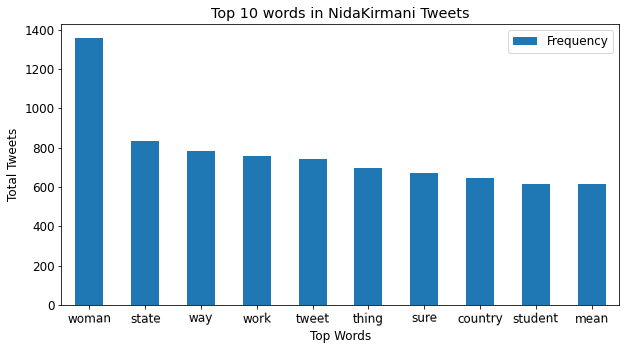

In [216]:
data.head(10).plot.bar(rot=1,figsize=[10,5],title='Top 10 words in '+name+' Tweets',
                       xlabel='Top Words',ylabel='Total Tweets')
plt.savefig('./images/topwords_'+name+'.eps', format='eps')

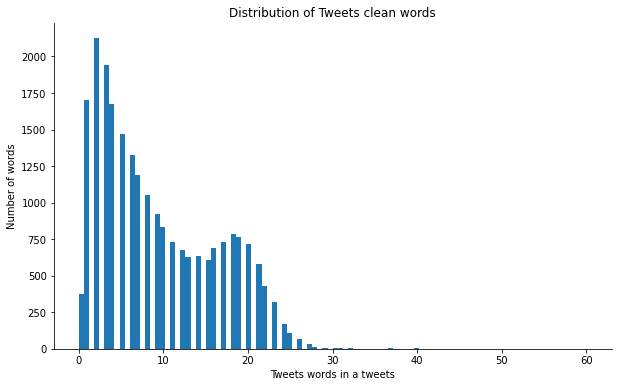

In [210]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df.lemmatized]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Tweets clean words')
plt.ylabel('Number of words')
plt.xlabel('Tweets words in a tweets')
sns.despine();

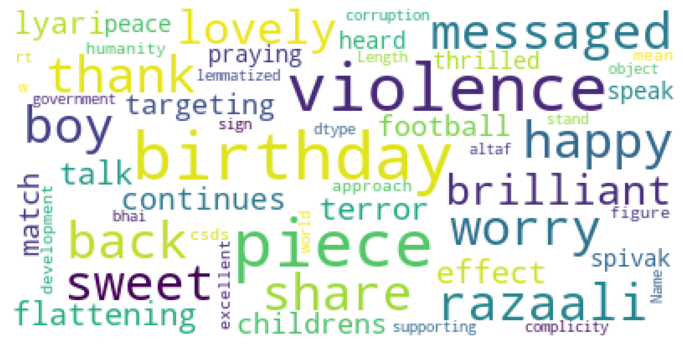

In [211]:
import matplotlib as mpl
from subprocess import check_output
from wordcloud import WordCloud
mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(stopword)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=100
                         ).generate(str(df.lemmatized))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud_sm.'+name+'.eps', format='eps')
plt.show()


In [212]:
all_words = [word for tokens in df['lemmatized'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['lemmatized']]
vocab = sorted(list(set(all_words)))
print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

216048 words total, with a vocabulary size of 20190
Max tweet length is 60
